In [1]:
from ni_eeg_forward_project.util.downsample_leadfield import downsample_leadfield_matrix
from ni_eeg_forward_project.util.access_atlases import get_labels_of_points, filter_for_regions
import numpy as np
import mne
from neurolib.utils.atlases import AutomatedAnatomicalParcellation2

In [2]:
fname = "../../neurolib/data/datasets/eeg_fsaverage/fsaverage_fwd_sol/fsaverage_surface_src_fixed_orientation-fwd.fif"
fwd = mne.read_forward_solution(fname)

fwd_fixed = mne.convert_forward_solution(fwd, surf_ori=True, force_fixed=True,
                                         use_cps=True)

subject = "fsaverage"
trans = "fsaverage"

Reading forward solution from /Users/martin/Documents/Uni_MSc/Semester04/ni_project/neurolib/ni_eeg_forward_project/playground_dev/../../neurolib/data/datasets/eeg_fsaverage/fsaverage_fwd_sol/fsaverage_surface_src_fixed_orientation-fwd.fif...
    Reading a source space...
    Computing patch statistics...
    Patch information added...
    [done]
    Reading a source space...
    Computing patch statistics...
    Patch information added...
    [done]
    2 source spaces read
    Desired named matrix (kind = 3523) not available
    Read EEG forward solution (8196 sources, 94 channels, free orientations)
    Source spaces transformed to the forward solution coordinate frame
    Average patch normals will be employed in the rotation to the local surface coordinates....
    Converting to surface-based source orientations...
    [done]


In [3]:
if len(fwd_fixed["src"]) == 2:

    # 0 is left, 1 is right hemisphere
    lh = fwd_fixed['src'][0]
    dip_pos_lh = np.vstack(lh['rr'][lh['vertno']])
    rh = fwd_fixed['src'][1]
    dip_pos_rh = np.vstack(rh['rr'][rh['vertno']])

    if dip_pos_lh.shape != dip_pos_rh.shape:
        raise ValueError("Hemispheres ...")

    dip_pos = np.vstack((dip_pos_lh, dip_pos_rh))
else:
    raise ValueError("Other format than expected for a surface source space for whole brain.")

In [5]:
trafo = mne.read_trans("/Users/martin/Documents/Uni_MSc/Semester04/ni_project/neurolib/neurolib/data/datasets/eeg_fsaverage/fsaverage/bem/fsaverage-trans.fif")
dip_pos_mni = mne.head_to_mni(dip_pos, subject="fsaverage", mri_head_t=trafo)

In [30]:
points_found, label_codes, label_strings = get_labels_of_points(dip_pos_mni, atlas="aal2")

In [39]:
aal_2 = AutomatedAnatomicalParcellation2()

regions = []
for r in aal_2.cortex:
    regions.append(aal_2.aal2[r+1])

in_regions = filter_for_regions(label_strings, regions)

for idx_point in range(len(points_found)):
    if not in_regions[idx_point]:
        label_codes[idx_point] = 0
        label_strings[idx_point] = ""

In [40]:
leadfield_full = fwd_fixed['sol']['data']
unique_labels, leadfield_downsampled = downsample_leadfield_matrix(leadfield_full, label_codes)

In [41]:
leadfield_downsampled.shape

(94, 80)

In [42]:
import matplotlib.pyplot as plt

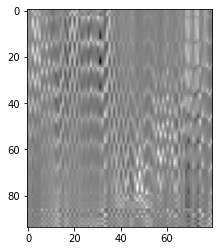

In [44]:
plt.imshow(leadfield_downsampled, cmap='gray')

In [46]:
default_leadfield = np.load("default_leadfield.npy")

In [48]:
np.all(default_leadfield == leadfield_downsampled)

True